## Lab 5

In [2]:
import pandas as pd
import numpy as np

# pre-processing data tool
from sklearn.preprocessing import StandardScaler

# metric tools
from sklearn.metrics import silhouette_score

# plotting tools
import matplotlib.pyplot as plt

# models
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# evaluation tools
from sklearn.metrics import silhouette_score

In this lab, we will use the red wine quality dataset which is attached with the instructions, you can find the description at https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data. 

#### Question 1

Make a data frame with first 11 columns from the original dataset You will apply the different clusters you learned in class to this dataset. Then,processing the dataset, you may deal with the null value, high related factors. (10)

In [3]:
# Write your code here
wine_df = pd.read_csv('winequality-red.csv')

print(wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
missing_percentage = wine_df.isnull().sum()
print(missing_percentage)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


 #### Question 2 

Apply K-Means Cluster to the dataset, Apply K-Means Cluster to the dataset, print the Silhouette score (10).

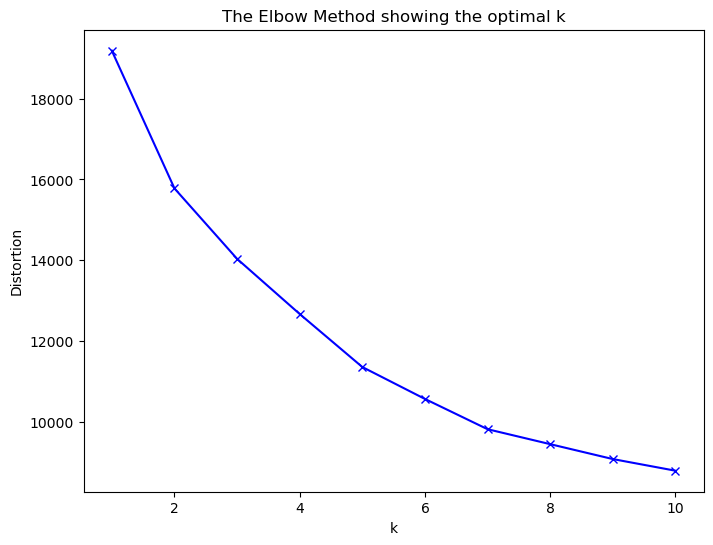

Silhouette Score for k=3: 0.17


In [5]:
# 1. Let's standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_df)

# Determine the optimal number of clusters using the Elbow Method
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Choose the optimal number of clusters based on the elbow method
optimal_k = 3  # For example, choose k=3

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# calculate and print the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}')

#### Question 3

Apply Hierarchical to the dataset, Apply K-Means Cluster to the dataset, print the Silhouette score.(10)

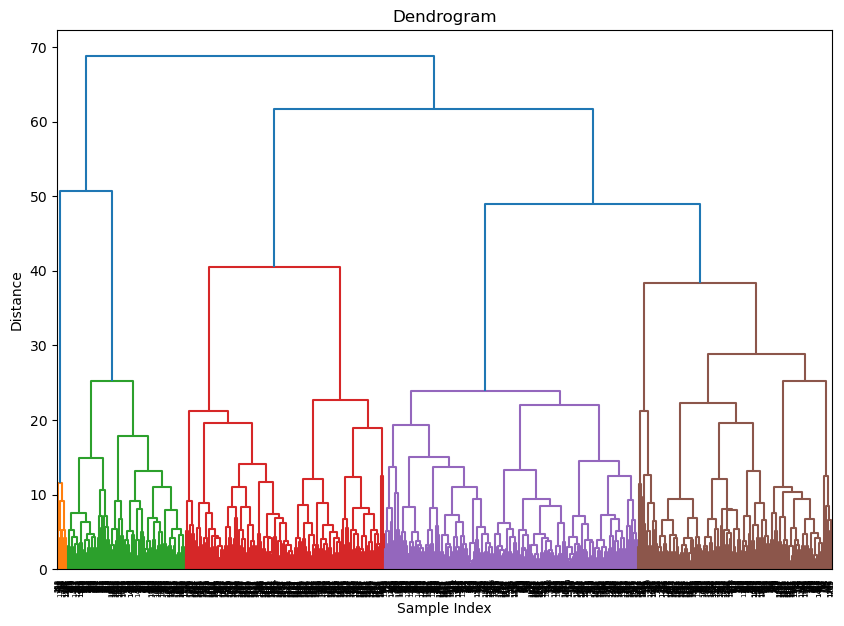

Silhouette Score: 0.25


In [6]:
# Write your code here

# plotting the hierarchical clusters
Z = linkage(X_scaled, method = 'ward')

plt.figure(figsize=(10,7))
dendrogram(Z)

plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# sillhouette coefficient score
max_d = 3  # the number of clusters calculated in the k-model
clusters = fcluster(Z, max_d, criterion='distance')

# names of labels(features)
wine_df['Cluster'] = clusters


silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

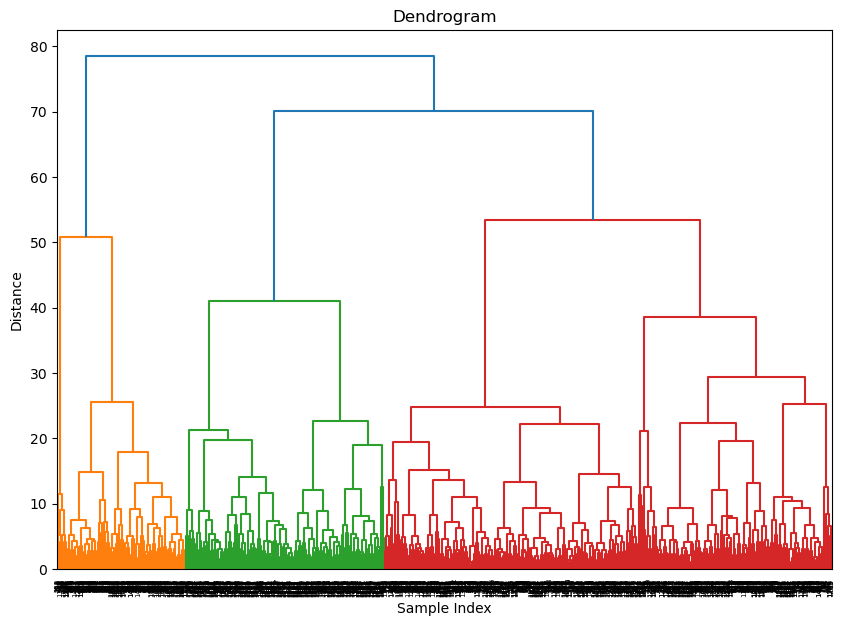

Silhouette Score: 0.15


In [7]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming wine_df is your DataFrame
# 1. Let's standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_df)

# 2. Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# 3. Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 4. Form clusters based on the dendrogram
max_d = 7  # Adjust this value based on your dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

# Alternatively, you can specify the number of clusters
# k = 3
# clusters = fcluster(Z, k, criterion='maxclust')

# Add the cluster labels to your DataFrame (optional)
wine_df['Cluster'] = clusters

# 5. Calculate and print the silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')


In [8]:
# Finding the best 'eps' and 'min_samples'
# Define a range of values for eps and min_samples
param_grid = {
    'eps': [i for i in range(1, 11)], 
    'min_samples': [i for i in range(2, 51)]  
}

# Initialize variables to store best parameters and best silhouette score
best_params = None
best_score = -1

# Iterate over all parameter combinations
for params in ParameterGrid(param_grid):
    # Fit DBSCAN with current parameters
    db = DBSCAN(**params).fit(data)
    
    # Compute silhouette score
    labels = db.labels_
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(data, labels)
    else:
        score = -1  # Assign a low score if only one cluster is found
    
    # Update best parameters and best score if current score is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and corresponding silhouette score
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

NameError: name 'ParameterGrid' is not defined

#### Question 4

Apply DBScan to the dataset, print the Silhouette score and best cluster number.(10)

In [ ]:
# Write your code here


#### Question 5

Now make cluster number = 10, redo the cluste process and print the Silhouette scores. (10)

In [ ]:
# Write your code here

#### Question 6

Match the cluster results with the 12th column, "quality", to add a column named as "prediction". For example, find all the data with quality = 6, and count the number of cluster numbers if in total there are 120 data with quality = 6 and 100 of their cluster numbers are 2, then all the data with cluster number = 2 should be marked as 6 in the "prediction" column. (10)

In [5]:
# Write your code here

#### Question 7

Now get the accracy score with the "Prediction" column and "quality" column.(10)

In [ ]:
# Write your code here

#### Question 8

Now seperate the data with 80% training set and 20% testing set and train a ANN model with the training set and print the accuracy score of the testing set.(10)

In [ ]:
# Write your code here

#### Question 9

Compare the accuracy scores of the previous four models, which one is the best?(10)

Write your code here

#### Question 10

Do you think we can use the unsupervised cluster models tobe a classifier in this way? Why?(10)

Write your code here